In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import category_encoders as ce
import statsmodels.stats.power as smp
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import math


df_org = pd.read_csv(r"census_income_original_2.csv")
df = df_org.copy()

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_6556\1224125772.py:12: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv(r"census_income_original_2.csv")


In [5]:
import pandas as pd
import numpy as np
df['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

df['income_value'] = pd.to_numeric(df['income_value'], errors='coerce')
df = df[df['income_value'].notna()]
df = df[~((df['income>50k'] == 1) & (df['income_value'] <= 50000))]
df['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

high_income = df[df['income>50k'] == 1]
low_income = df[df['income>50k'] == 0]

high_income_count = int(len(high_income) * 0.5)
low_income_count = int(high_income_count * 3)

high_income_sampled = high_income.sample(n=high_income_count, random_state=42)
low_income_sampled = low_income.sample(n=low_income_count, random_state=42)

stratified_sample = pd.concat([high_income_sampled, low_income_sampled])

sample_mean = stratified_sample['income_value'].mean()
pop_mean = df['income_value'].mean()

high_income_prop = len(high_income) / len(df)
low_income_prop = len(low_income) / len(df)

high_income_sampled_prop = len(high_income_sampled) / len(stratified_sample)
low_income_sampled_prop = len(low_income_sampled) / len(stratified_sample)

print(f"Stratified Sample Size: {stratified_sample.shape[0]}")
print(f"Population Size: {len(df)}")
print(f"Sample Mean: {sample_mean:.2f} || Population Mean: {pop_mean:.2f}")
print(f"Proportions in Population - High: {high_income_prop:.3f}, Low: {low_income_prop:.3f}")
print(f"Proportions in Stratified Sample - High: {high_income_sampled_prop:.3f}, Low: {low_income_sampled_prop:.3f}")
print(f"High Income Sample Size: {len(high_income_sampled)} || Low Income Sample Size: {len(low_income_sampled)}")


Stratified Sample Size: 32
Population Size: 13085
Sample Mean: 32658.75 || Population Mean: 10193.00
Proportions in Population - High: 0.001, Low: 0.999
Proportions in Stratified Sample - High: 0.250, Low: 0.750
High Income Sample Size: 8 || Low Income Sample Size: 24


In [7]:
pop_mu_aprox = stratified_sample['income_value'].mean()
t_stat, p_value = stats.ttest_1samp(df['income_value'], pop_mu_aprox)
p_value_one_tailed = p_value / 2

alpha = 0.05
print(f"{p_value_one_tailed:.15f}")
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis. The sample mean is SIGNIFICANTLY LESS than the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is NOT SIGNIFICANTLY LESS than the population mean.")

0.000000000000000
Reject the null hypothesis. The sample mean is SIGNIFICANTLY LESS than the population mean.


In [8]:
pop_mu_aprox

32658.75

In [ ]:
income_value['income>50k'].value_counts()

In [10]:


def plot_cont(df, col, bins=20):
    # Calculate Q1, Q3, IQR, and the lower and upper bounds for outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_value = df[col].min()
    max_value = df[col].max()
    
    # Freedman-Diaconis bin calculation

    # Calculate outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers for {col}:")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {outliers.shape[0]}")

    from scipy.stats import zscore

    df['zscore'] = zscore(df[col])
    outliers = df[df['zscore'].abs() > 3]  # For example, z-scores greater than 3 indicate outliers
    print(f"Number of outliers based on z-score: {outliers.shape[0]}")

    
    # Plotting
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")

    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot for {col}")

    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()


Outliers for income_value:
Lower bound: -11053.5, Upper bound: 29814.5
Number of outliers: 461
Number of outliers based on z-score: 312


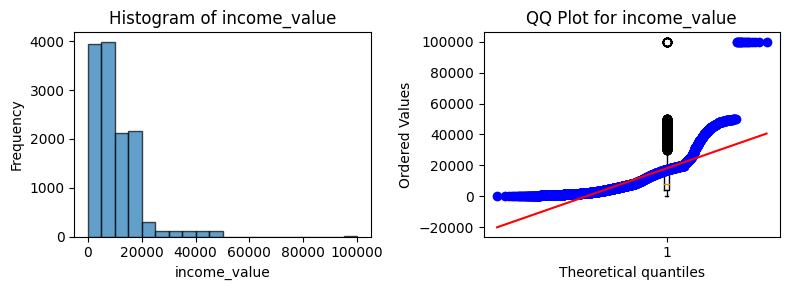

<Figure size 640x480 with 0 Axes>

In [11]:
plot_cont(df, "income_value", bins=20)